In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [9]:
# Import the data into the system
insuranceData = pd.read_csv("C:\\Users\\prati\\Internship_iNeuron\\Dataset\\insurance.csv")
insuranceData.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
def labels_barPlot(dataFrame_Name,xAxisColName,yAxisColName,xlabelName,ylabelName,
                   grphTitle,extrahtforlabel =5,sizelabel=45,
                  figureHeight=50,figureWidth=40,xlabelNameSize=34,ylabelNamesize=44,grphTitlesize=44,
                  xticksFontSize=44,yticksFontSize=44):
    
    #Design the figure height and width
    plt.figure(figsize=(figureHeight,figureWidth))

    #Bar plot using sns
    plots = sns.barplot(x=xAxisColName,y=yAxisColName,data=dataFrame_Name)

    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # sfree space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    for bar in plots.patches:
            plots.annotate(format(bar.get_height(), '.0f'),
                           (bar.get_x() + bar.get_width() / 2, 
                            bar.get_height()+extrahtforlabel), ha='center', 
                           va='center', size=sizelabel, 
                           xytext=(0, 8),textcoords='offset points')   
    # Setting the label for x-axis
    plt.xlabel(xlabelName, size=xlabelNameSize)

    # Setting the label for y-axis
    plt.ylabel(ylabelName, size=ylabelNamesize)
    plt.xticks(fontsize=xticksFontSize, rotation=90)
    plt.yticks(fontsize=yticksFontSize, rotation=90)
    # Setting the title for the graph
    plt.title(grphTitle, size=grphTitlesize)
    # Fianlly showing the plot
    plt.tight_layout()
    

In [11]:
# Store the list of column names 
colnames = list(insuranceData.columns)
colnames[0:6]

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [12]:
insuranceData['smoker'] = insuranceData['smoker'].replace({"yes":1,"no":0})
insuranceData['sex'] = insuranceData['sex'].replace({"male":1,"female":0})
insuranceData['region'] = insuranceData['sex'].replace({"southwest":0,"southeast":1,"northeast":2,"northwest":3})

insuranceData.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,-0.020856,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,1.000000,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.046380,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.017163,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.076185,0.787251
region,-0.020856,1.000000,0.046380,0.017163,0.076185,1.000000,0.057292
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,0.057292,1.000000


In [13]:
# Smoker vs Expenses almost 79% correlation
# Age vs Expenses almost 30% correlation
# BMI vs Expenses almost 20% correlation
# Number of children ,region ,sex are not contributing to expenses
insuranceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [14]:
#import pandas as pd
#['age', 'sex', 'bmi', 'children', 'smoker', 'region']
columns_new = list(['sex', 'children', 'smoker', 'region'])
categorical_cols = list(insuranceData[['sex', 'children', 'smoker', 'region']])
encodedDf_insurance = pd.get_dummies(insuranceData, columns = categorical_cols)
encodedDf_insurance.head()

,age,bmi,expenses,sex_0,sex_1,children_0,children_1,children_2,children_3,children_4,children_5,smoker_0,smoker_1,region_0,region_1
0,19,27.9,16884.92,1,0,1,0,0,0,0,0,0,1,1,0
1,18,33.8,1725.55,0,1,0,1,0,0,0,0,1,0,0,1
2,28,33.0,4449.46,0,1,0,0,0,1,0,0,1,0,0,1
3,33,22.7,21984.47,0,1,1,0,0,0,0,0,1,0,0,1
4,32,28.9,3866.86,0,1,1,0,0,0,0,0,1,0,0,1


In [15]:
y=encodedDf_insurance['expenses']
X=encodedDf_insurance.drop(columns='expenses')


In [16]:
from sklearn.model_selection import train_test_split  #To split the dataset into Train and test randomly
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=0)


Hyperparameter Tuning

In [24]:
#Random Hyperparameter Grid
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 32, 55, 77, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
#Random Search Training

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)


In [26]:
rf_random.fit(train_X,train_y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 32, 55, 77, 100]},
                   random_state=42, verbose=2)

In [27]:
rf_random.best_params_


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [28]:
#Evaluate Random Search
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [29]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [30]:
base_model.fit(train_X,train_y)
base_accuracy = evaluate(base_model, test_X, test_y)


Model Performance
Average Error: 2555.9543 degrees.
Accuracy = 68.42%.


In [31]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  test_X, test_y)


Model Performance
Average Error: 2373.7707 degrees.
Accuracy = 70.11%.


In [32]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.47%.


In [33]:
#Grid Search with Cross Validation
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [34]:
# Create a based model
rf_GSCV = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_GSCV, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [35]:
grid_search.fit(train_X,train_y)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [36]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [37]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_X, test_y)

Model Performance
Average Error: 2767.4902 degrees.
Accuracy = 65.98%.


In [38]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -3.56%.


In [39]:
model_RFReg = RandomForestRegressor(n_estimators = 100, 
                               min_samples_split = 10,
                               min_samples_leaf= 4, 
                               max_features = 'auto',
                               max_depth= 20, bootstrap=True,random_state=42) 


In [40]:
model_RFReg.fit(train_X,train_y)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [41]:
train_predict = model_RFReg.predict(train_X)
test_predict = model_RFReg.predict(test_X)

In [42]:
predicted_df = pd.DataFrame({"Actual":test_y,"Predicted":test_predict})
predicted_df.head()

,Actual,Predicted
578,9724.53,11906.795945
610,8547.69,11081.531452
569,45702.02,45268.287345
1034,12950.07,13757.038352
198,9644.25,10083.411759


In [43]:
print("Train : ",mean_absolute_error(train_y,train_predict))
print("Test  : ",mean_absolute_error(test_y,test_predict))
print("====================================")

print("MSE")
print("Train : ",mean_squared_error(train_y,train_predict))
print("Test  : ",mean_squared_error(test_y,test_predict))
print("====================================")

print("RMSE")
print("Train : ",np.sqrt(mean_squared_error(train_y,train_predict)))
print("Test  : ",np.sqrt(mean_squared_error(test_y,test_predict)))
print("====================================")

print("R2 SCORE")
print("Train : ",r2_score(train_y,train_predict))
print("Test  : ",r2_score(test_y,test_predict))  
print("====================================")

Train :  2061.2666262190596
Test  :  2330.9588165565438
MSE
Train :  14154583.485414864
Test  :  16142191.632264422
RMSE
Train :  3762.257764350399
Test  :  4017.734639353926
R2 SCORE
Train :  0.9012696968579237
Test  :  0.898559697163813


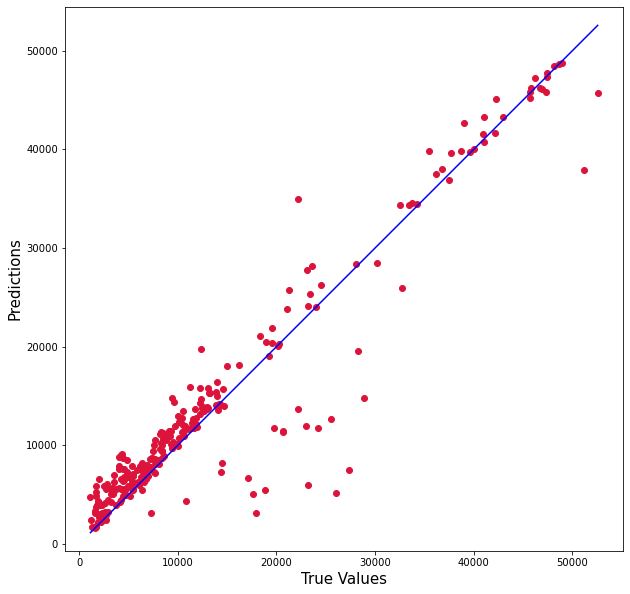

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(test_y,test_predict, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(test_predict), max(test_y))
p2 = min(min(test_predict), min(test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()